In [2]:
from google.colab import drive                #For linking colab to Google Drive
import pandas as pd                           #gestionar datframes
import numpy as np                            #numeric python vectores
import matplotlib.pyplot as plt               #graficos estadisticos
from pandas.api.types import CategoricalDtype #For definition of custom categorical data types (ordinal if necesary)
import seaborn as sns                         #For hi level, Pandas oriented, graphics
import scipy.stats as stats                   #For statistical inference

In [3]:
drive.mount('mydrive')                        #Bridge to Google Drive

Mounted at mydrive


In [4]:
spoti = pd.read_csv ('/content/mydrive/MyDrive/EDEM/spotify.csv', sep=';')
spoti

,ID,title,artist,genre,year,bpm,nrgy,dnce,val,dur,lyrics,pop
0,1,"Hey, Soul Sister",Train,no pop,2010,97,89,67,80,217,4,83
1,2,Love The Way You Lie,Eminem,no pop,2010,87,93,75,64,263,23,82
2,3,TiK ToK,Kesha,pop,2010,120,84,76,71,200,14,80
3,4,Bad Romance,Lady Gaga,pop,2010,119,92,70,71,295,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,43,221,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,pop,2019,104,66,61,16,176,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,61,206,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,pop,2019,136,76,53,65,260,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,pop,2019,114,79,60,24,217,7,69


# GENRE, MEAN COMPARISON

In [5]:
#VARIABLE PREDICHA ES POPULARIDAD
#VARIABLE PREDICTORA ES GENERO
#hacemos describe de la popularidad
popu = spoti['pop'].describe()
popu

count    603.000000
mean      66.520730
std       14.517746
min        0.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       99.000000
Name: pop, dtype: float64

In [9]:
n = popu[0]
m_popu = popu[1]
sd_popu = popu[2]

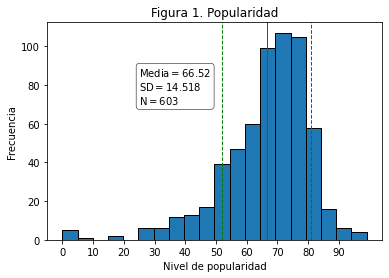

In [10]:
#Histograma de Popularidad
x=spoti['pop']
plt.hist(x,edgecolor='black',bins=20)
plt.xticks(np.arange(0,100, step=10))
plt.title("Figura 1. Popularidad")
plt.ylabel('Frecuencia')
plt.xlabel('Nivel de popularidad')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{Media}=%.2f$\n$\mathrm{SD}=%.3f$\n$\mathrm{N}=%.0f$'%(m_popu, sd_popu, n)
plt.text (25,70, textstr , bbox=props)
plt.axvline(x=m_popu, linewidth=1, linestyle= 'solid', color="red", label='Mean')
plt.axvline(x=m_popu-sd_popu, linewidth=1, linestyle= 'dashed', color="green", label='- 1 S.D.')
plt.axvline(x=m_popu + sd_popu, linewidth=1, linestyle= 'dashed', color="green", label='+ 1 S.D.')

In [11]:
#Hacemos describe de nuestra primera variable predictora [Genero]
gen = spoti.genre.describe()
gen

count     603
unique      2
top       pop
freq      468
Name: genre, dtype: object

genre
no pop    135
pop       468
dtype: int64
genre
no pop    22.38806
pop       77.61194
dtype: float64


<BarContainer object of 2 artists>

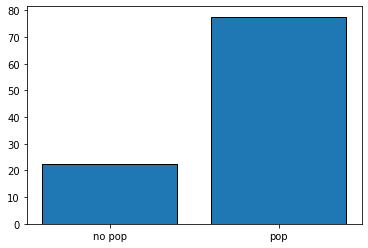

In [12]:
#Tabla de Genero y su Plot
gen_table = spoti.groupby(['genre']).size()
print(gen_table)
n=gen_table.sum()
gen_table2 = (gen_table/n)*100
print(gen_table2)
n=gen_table.sum()
bar_list = ['no pop', 'pop']
plt.bar(bar_list, gen_table2, edgecolor='black')

In [13]:
#ESCOGEMOS LA VARIABLE GENERO Y POPULARIDAD COMO SUJETO DE ESTUDIO
#Descriptive comparison:
print(spoti.groupby('genre').pop.mean())


genre
no pop    66.303704
pop       66.583333
Name: pop, dtype: float64


In [14]:
#Statistical [Mean] comparison:
#Extract the two sub samples and store them in two objects
pop_no_popu=spoti.loc[spoti.genre=='no pop', "pop"]
pop_popu=spoti.loc[spoti.genre=='pop', "pop"] 

res = stats.f_oneway(pop_no_popu,pop_popu)
print(res)

F_onewayResult(statistic=0.03880934827345951, pvalue=0.8438934483506649)


Text(0.5, 1.0, 'Figure 2. Average Popularity by Genre.\n')

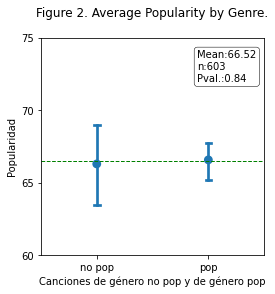

In [17]:
#CI meanplot
#Graphic comparison: confidence intervals for the means
plt.figure(figsize=(4,4))
ax = sns.pointplot(x="genre", y="pop", data=spoti,capsize=0.05, ci=95, join=0, order=['no pop', 'pop'])
ax.set_ylabel('Popularidad')
plt.yticks(np.arange(60, 80, step=5))
plt.axhline(y=spoti['pop'].mean(),linewidth=1,linestyle= 'dashed',color="green")
props = dict(boxstyle='round', facecolor='white', lw=0.5)
plt.text(0.9,72,'Mean:66.52''\n''n:603''\n' 'Pval.:0.84', bbox=props)
plt.xlabel('Canciones de género no pop y de género pop')
plt.title('Figure 2. Average Popularity by Genre.''\n')

As p value is greater than 0.05, We do not reject the null

Average popularity do not significantly differ in No Pop and Pop songs

# DANCEABILITY, CORRELATION

In [16]:
#VARIABLE PREDICHA ES POPULARIDAD
#VARIABLE PREDICTORA ES DANCEABILITY
#hacemos describe de la danceability
dance = spoti['dnce'].describe()
dance

count    603.000000
mean      64.379768
std       13.378718
min        0.000000
25%       57.000000
50%       66.000000
75%       73.000000
max       97.000000
Name: dnce, dtype: float64

In [18]:
m_dance = dance[1]
sd_dance = dance[2]
n = 603

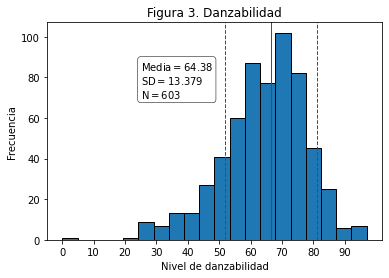

In [19]:
#Histograma de Danceability
x=spoti['dnce']
plt.hist(x,edgecolor='black',bins=20)
plt.xticks(np.arange(0,100, step=10))
plt.title("Figura 3. Danzabilidad")
plt.ylabel('Frecuencia')
plt.xlabel('Nivel de danzabilidad')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{Media}=%.2f$\n$\mathrm{SD}=%.3f$\n$\mathrm{N}=%.0f$'%(m_dance, sd_dance, n)
plt.text (25,70, textstr , bbox=props)
plt.axvline(x=m_popu, linewidth=1, linestyle= 'solid', color="red", label='Mean')
plt.axvline(x=m_popu-sd_popu, linewidth=1, linestyle= 'dashed', color="green", label='- 1 S.D.')
plt.axvline(x=m_popu + sd_popu, linewidth=1, linestyle= 'dashed', color="green", label='+ 1 S.D.')

Text(0, 0.5, 'Popularidad')

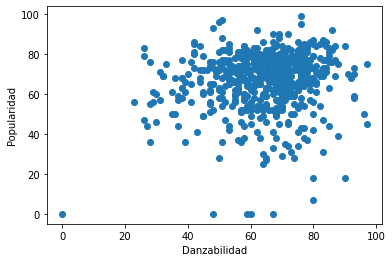

In [25]:
###################Scatterplot
###Eje x Danzabilidad; Eje y = Popularidad
#Primero la variable predictora y luego la predicha
plt.scatter(spoti['dnce'], spoti['pop'])
plt.xlabel('Danzabilidad')
plt.ylabel('Popularidad')

In [28]:
#Que estadistico mide la asociacion entre dos cuantitativas 
###Correlation [lineal], que se hace con pearsonr (de -1 a +1) 
from scipy.stats.stats import pearsonr

x=spoti['dnce']
y=spoti['pop']
pearsonr(x,y)

r, p_val=pearsonr(x,y)

print(r,p_val)

#necesitamos el tamaño muestral [n]
n=len(spoti['pop'])
print ('r:', round(r,3), 'P.Val:', round(p_val,3), 'n:', n)

0.11605444461442102 0.004323042649723469
r: 0.116 P.Val: 0.004 n: 603


As p value is lower than 0.05, we do reject the null

Popularity do significantly differ in danceability


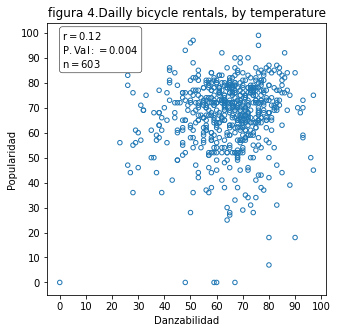

In [38]:
###Include correlation result into plot 
plt.figure(figsize=(5,5))
plt.scatter(spoti['dnce'], spoti['pop'], s=20, facecolors='none', edgecolors='C0')
plt.xticks(np.arange(0, 110, step=10))
plt.yticks(np.arange(0, 110, step=10))
plt.title("figura 4.Dailly bicycle rentals, by temperature")
plt.ylabel('Popularidad')
plt.xlabel('Danzabilidad')
props=dict(boxstyle='round', facecolor='white', lw=0.5)
textstr= '$\mathrm{r}=%.2f$\n$\mathrm{P.Val:}=%.3f$\n$\mathrm{n}=%.0f$'%(r, p_val, n)
plt.text (1,86, textstr , bbox=props)
plt.show()